In [28]:
from glob import glob

for g in glob('../data/*.pdf'):
  print(g)

../data/2040_seoul_plan.pdf
../data/OneNYC_2050_Strategic_Plan.pdf


In [29]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter


def read_pdf_and_split_text(pdf_path, chunk_size=1000, chunk_overlap=100):
  """
  주어진 PDF 파일을 읽고 텍스트를 분할합니다.

  매개변수:
    pdf_path (str): PDF 파일의 경로.
    chunk_size (int, 선택적): 각 텍스트 청크의 크기. 기본값은 1000
    chunk_overlap (int, 선택적): 청크 간의 중첩 크기. 기본값은 100
  반환값:
    list: 분할된 텍스트 청크의 리스트.
  """
  print(f"PDF {pdf_path} -----------------------------")

  pdf_loader = PyPDFLoader(pdf_path)
  data_from_pdf = pdf_loader.load()

  text_splitter = RecursiveCharacterTextSplitter(
      chunk_size=chunk_size, chunk_overlap=chunk_overlap
  )

  splits = text_splitter.split_documents(data_from_pdf)

  print(f"Number of splits: {len(splits)}\n")
  return splits

In [30]:
from langchain_openai import OpenAIEmbeddings
from dotenv import load_dotenv
from langchain_chroma import Chroma
import os

load_dotenv()

embedding = OpenAIEmbeddings(model='text-embedding-3-large')

persist_directory = '../chroma_store'

if os.path.exists(persist_directory):
  print("Loading existing Chroma store")
  vectorstore = Chroma(
      persist_directory=persist_directory,
      embedding_function=embedding
  )
else:
  print("Creating new Chroma store")

  vectorstore = None
  for g in glob('../data/*.pdf'):
    chunks = read_pdf_and_split_text(g)
    for i in range(0, len(chunks), 100):
      if vectorstore is None:
        vectorstore = Chroma.from_documents(
            documenets=chunks[i:i + 100],
            embedding=embedding,
            persist_directory=persist_directory
        )
      else:
        vectorstore.add_documents(
            documents=chunks[i:i + 100]
        )

Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


Loading existing Chroma store


In [31]:
retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

chunks = retriever.invoke("서울 온실가스 저감 계획")

for chunk in chunks:
  print(chunk.metadata)
  print(chunk.page_content)

{'page': 63, 'source': '../data/2040_seoul_plan.pdf'}
56제2장 미래상과 목표
6. 미래위기를 준비하는, ‘탄소중립 안전도시 구축’1) 배경전(全) 지구적인 기후변화에 대응하기 위한 대도시 차원의 대응 필요Ÿ서울시 2017년 온실가스 배출량은 46,685천 톤CO2eq로 2005년 배출량에 비해 5.6%(276만 톤CO2eq) 감소하였으며, 서울의 1인당 온실가스 배출량은 4.7CO2eq로 국가의 13.8톤CO2eq에 비해 낮은 수준이다. 또한 2014년 기준 서울의 1인당 온실가스 배출량은 4.5CO2eq로 세계 주요 도시에 비해 낮은 수준을 보인다.7)
[그림 2-26] 세계 주요 도시 1인당 온실가스 배출량   자료: World Bank, 2014Ÿ그럼에도 불구하고, 기후변화 문제는 21세기에 전 지구적으로 가장 위중한 영향을 미칠 것으로 예상되는바, 탄소중립과 기후위기 대응은 국제·국가·도시의 핵심 정책으로 다루어져야 한다.Ÿ파리협정(2015) 이후, 우리나라를 비롯한 미국, 유럽연합 등 세계 136개국이 탄소중립을 선언하였으며, 서울시를 비롯한 뉴욕, 런던 등과 같은 많은 글로벌 도시에서 탄소중립을 시정의 핵심과제로 추진 중이다.Ÿ우리나라는 2020년 ‘한국판 그린뉴딜’을 발표하며 공식적으로 2050 탄소중립을 선언하였으며 서울시 역시 2020년 ‘그린뉴딜 추진을 통한 2050 온실가스 감축 전략’을 발표하고 탄소중립 선언에 따른 부문별 사업을 적극 추진하고 있다.-서울시는 2050년 탄소중립을 목표로 2030년까지 2005년 배출량 대비 40%, 2040년까지 70% 감축목표를 제시하였고, 2022년 기후변화대응종합계획을 수립하여, 향후 5년간(’22~’26년) 2005년 대비 온실가스 30% 감축목표와 구체적인 실행계획을 수립하였음7) 황인창 외, 2020, 파리협정 이행 위한 서울시 ‘2050 탄소중립’ 전략, 서울연구원, pp.6-9.
제3절 2040 서울도시기본계획 7대 목표57Ÿ특히, 서울시는 현재

In [32]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")
llm.invoke('안녕하세요!')

AIMessage(content='안녕하세요! 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 10, 'total_tokens': 20, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'finish_reason': 'stop', 'logprobs': None}, id='run--d2c7e449-93dc-467c-9ef6-b51fcbff8428-0', usage_metadata={'input_tokens': 10, 'output_tokens': 10, 'total_tokens': 20, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [33]:
from langchain_core.prompts import ChatPromptTemplate
from typing import Literal
from pydantic import BaseModel, Field


class RouteQuery(BaseModel):
  """사용자 쿼리를 가장 관련성이 높은 데이터 소스로 라우팅한다."""

  datasource: Literal["vectorstore", "casual_talk"] = Field(
      ...,
      description="""
      사용자 질문에 따라 casual_talk 또는 vectorstore로 라우팅한다.
      - casual_talk: 일상 대화를 위한 데이터 소스. 사용자가 일상적인 질문을 할 때 사용한다
      - vectorstore: 사용자 질문에 답하기 위해 RAG로 vectorstore 검색이 필요한 경우 사용한다.
      """
  )

In [34]:
structured_llm_router = llm.with_structured_output(RouteQuery)

router_system = """
당신은 사용자의 질문을 vectorstore 또는 casual_talk으로 라우팅하는 전문가이다.
- vectorstore에는 서울, 뉴욕의 발전계획과 관련된 문서가 포함되어 있다. 이 주제에 대한 질문에는 vectorstore를 사용하라.
- 사용자의 질문이 일상 대화에 관련된 경우 casual_talk을 사용하라.
"""

route_prompt = ChatPromptTemplate.from_messages([
  ("system", router_system),
  ("human", "{question}"),
])

question_router = route_prompt | structured_llm_router

In [35]:
print(
    question_router.invoke({
      "question": "서울 온실가스 저감 계획은 무엇인가요?"
    })
)

print(question_router.invoke({"question": "소리 지르는"}))

datasource='vectorstore'
datasource='casual_talk'


In [36]:
from langchain_core.prompts import PromptTemplate


class GradeDocuments(BaseModel):
  """검색된 문서가 질문과 관련성 있는지 yes 또는 no로 평가한다."""

  binary_score: Literal["yes", "no",] = Field(
      description="문서가 질문과 관련이 있는지 여부를 'yes' 또는 'no'로 평가한다."
  )


structured_llm_grader = llm.with_structured_output(GradeDocuments)

In [37]:
grader_prompt = PromptTemplate.from_template("""
당신은 검색된 문서가 사용자 질문과 관련이 있는지 평가하는 평가자입니다. \n
문서에 사용자 질문과 관련된 키워드 또는 의미가 포함되어 있으면, 해당 문서를 관련성이 있다고 평가하십시오. \n
엄격한 테스트가 필요하지 않습니다. 목표는 잘못된 검색 결과를 걸러내는 것입니다. \n
문서가 질문과 관련이 있는지 여부를 나타내기 위해 'yes' 또는 'no'로 이진 점수를 부여하십시오.

Retrieved document: \n {document} \n\n
User question: {question}
""")

retrieval_grader = grader_prompt | structured_llm_grader
question = "서울시 자율주행 관련 계획"
documents = retriever.invoke(question)

for doc in documents:
  print(doc)

page_content='36제2장 미래상과 목표
6) 미래교통수단의 등장과 첨단 인프라 요구 증대자율주행, UAM 등 미래 교통에 공간적 대응방안 마련 필요Ÿ자율주행차량, 전동킥보드 등 교통 기술의 발전에 따라 새로운 교통환경이 조성되고 있음에도 불구하고, 이에 대한 정착 가이드라인이 없어, 위험한 교통 사고가 유발되고 있다.-최근 3년간 서울시에서 발생한 전동킥보드 관련 사고 대다수는 전동 킥보드와 차량 간 충돌 사고Ÿ안전하고 효율적인 기존-신규 교통수단의 조화를 도모하고, 이와 함께 발생할 도시공간구조 변화에 대비하기 위해 통합적인 교통수단 정착 가이드라인이 필요하다.7) 시가지 공간의 포화, 개발가용지의 부족새로운 도시공간에 대한 수요 대응과 성장동력 확보 한계Ÿ서울의 녹지지역을 제외한 대부분의 개발가용지는 고갈된 상태이며, 남은 공간은 주택공급을 위주로 개발하고 있다.-서울시에서 개발제한구역 25%를 제외하면 65%에 해당하는 시가화면적 366㎢ 중 미개발지는 거의 없는 상태Ÿ외연적 팽창이 아닌, 선택과 집중을 통한 콤팩트 시티로의 공간구조 재편을 지향하고 복합 개발을 통해 약해진 도시경쟁력 강화가 필요한 시점이다.8) 늙어가는 서울, 도시 정비의 정체에 따른 환경 악화정비사업 추진동력 저하, 쾌적한 도시환경에 대한 요구 증대Ÿ2038년 서울시 기반시설 노후화 비율은 2018년 대비 2.7배 급증, 1960~70년대 집중 조성된 기반시설의 노후화에 따른 시설 안전성 확보가 필요하다.-2040년, 서울 전체 주택 중 노후 물량 50%로 추정Ÿ때문에, 쾌적한 도시환경 구축을 위해서는 노후 기반시설로 인한 안전성 검토와 개선비용 증가에 따른 선제적인 대응이 필요하다.
[그림 2-19] 서울시 전동킥보드 사고 추이자료: 서울시 소방재난본부
제1절 서울의 변화진단379) 경직된 서울, 도시계획 규제 완화에 대한 요구 증대지역특성과 미래변화를 고려한 유연한 도시계획 요구Ÿ과도한 도시계획 규제로 인해, 미래 융복합 시대에' metadata={'page': 43, 

In [38]:
filtered_docs = []

for i, doc in enumerate(documents):
  print(f"Document {i + 1}:")
  is_relevant = retrieval_grader.invoke({"question": question, "document": doc.page_content})
  print(is_relevant)
  print(doc.page_content[:200])
  print("=========================\n\n")

  if is_relevant.binary_score == "yes":
    filtered_docs.append(doc)

print(f"Filtered documents: {len(filtered_docs)}")

Document 1:
binary_score='yes'
36제2장 미래상과 목표
6) 미래교통수단의 등장과 첨단 인프라 요구 증대자율주행, UAM 등 미래 교통에 공간적 대응방안 마련 필요Ÿ자율주행차량, 전동킥보드 등 교통 기술의 발전에 따라 새로운 교통환경이 조성되고 있음에도 불구하고, 이에 대한 정착 가이드라인이 없어, 위험한 교통 사고가 유발되고 있다.-최근 3년간 서울시에서 발생한 전동킥보드 관련 사고 


Document 2:
binary_score='yes'
54제2장 미래상과 목표
5. 기술발전에 선제적 대응, ‘미래교통 인프라 구축’1) 배경미래교통수단 도입에 따른 도시 활동 변화 및 공간구조 재편 대비Ÿ빠르게 진화하는 미래 신 교통수단은 도시공간에 새로운 변화를 일으킬 것이며, 도시 내 이동패턴의 변화를 가져올 것으로 예측된다. 이러한 점을 고려하여 도시 내 다양한 통행행태가 공존하는 포용적인 교통체계 구


Document 3:
binary_score='yes'
제1절 서울의 변화진단353) 반복되는 팬데믹에 도시공간적 대응상수화되는 팬데믹, 회복탄력적 도시에 대한 관심 고조Ÿ2019년 발생한 코로나19에 의한 팬데믹은 서울시민의 일상생활을 마비시켰고 강제적인 거리두기 정책으로 경제위기가 심각해졌다.Ÿ전염병에 의한 팬데믹은 지속적으로 발생할 것으로 예측되고 있으며 이에 선제적인 예방 체계와 즉각적 대응을 위한 기반


Document 4:
binary_score='yes'
90제3장 부문별 전략계획
5-1 미래교통수단과 융합을 위한 선제적 교통환경 구축5-1-1 신 교통수단·기술발전 등 미래 환경 변화에 대비한 인프라 구축·정비ŸUAM·전기차·자율주행차 등 미래교통수단의 상용


Document 5:
binary_score='no'
146제5장 생활권계획
신규 역세권을 중심으로 새로운 중심지 육성Ÿ강북횡단선 등 도시철도망 구축계획에 따른 신규 역세권을 중심으로 지역 특성을 고려한 새로운 중심지를 육성하고, 도로·교통시설을 재구축하여 도시기능을

In [39]:
rag_generate_system = """
너는 사용자의 질문에 대해 주어진 context에 기반하여 답변하는 도시 계획 전문가이다.
주어진 context는 vectorstore에서 검색된 결과이다.
주어진 context를 기반으로 사용자의 question에 대해 답변하라

========================
question: {question}
context: {context}
"""

rag_prompt = PromptTemplate(
    input_variables=["question", "context"],
    template=rag_generate_system
)

rag_chain = rag_prompt | llm

question = "서울시 자율주행 관련 계획"

rag_chain.invoke({"question": question, "context": filtered_docs})

AIMessage(content='서울시는 자율주행 관련 계획을 통해 2030년까지 간선도로급 이상의 도로에서 자율주행 자동차가 운영될 수 있는 인프라 환경을 조성하고, 2040년까지 서울 전역에서 자율주행차량의 운행 환경을 구축할 목표를 세우고 있습니다. 이 계획의 일환으로, 자율주행차량의 수송 분담률을 10%로 달성하는 것을 목표로 하고 있습니다.\n\n또한, 서울은 도심 항공교통(UAM) 기반을 마련하고, 주요 수변 공간 중심으로 광역노선을 확장하며, 모빌리티 허브를 도입하여 다양한 기능을 복합적으로 제공하는 지역 거점을 구축할 계획입니다. 이러한 조치들은 서울의 미래 교통 환경을 보다 안전하고 효율적으로 만들기 위한 통합적인 교통수단 정착 가이드라인의 일환으로 추진되고 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 203, 'prompt_tokens': 2064, 'total_tokens': 2267, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'finish_reason': 'stop', 'logprobs': None}, id='run--4bf5880d-6e29-41fd-b80e-7b5b591c40bd-0', usage_metadata={'input_tokens': 2064, 'output_tokens': 203, 'total_tokens': 2267, 'inpu

In [40]:
from typing import List
from typing_extensions import TypedDict

class GraphState(TypedDict):
  question: str
  generation: str
  documents: List[str]

In [41]:
def route_question(state):
  """
  사용자 질문을 vectorstore 또는 casual_talk로 라우팅 한다.

  Args:
    state (dict): 현재 graph state

  return:
    state (dict): 라우팅된 데이터 소스와 사용자 질문을 포함하는 새로운 graph state
  """
  print('--------ROUTE---------')
  question = state['question']
  route = question_router.invoke({"question": question})

  print(f"---Routing to {route.datasource}----")
  return route.datasource

In [42]:
def retrieve(state):
  """
  vectorstore에서 질문에 대한 문서를 검색한다.

  Args:
    state (dict): 현재 graph state

  return:
    state (dict): 검색된 문서와 사용자 질문을 포함하는 새로운 graph state
  """
  print('---RETRIEVE----')
  question = state['question']

  documents = retriever.invoke(question)
  return {"documents": documents, "question": question}

In [43]:
def grade_documents(state):
  """
  검색된 문서를 평가하여 질문과 관련성이 있는지 확인한다.

  Args:
    state (dict): 현재 graph state
  return:
    state (dict): 관련성이 있는 문서와 사용자 질문을 포함하는 새로운 graph state
  """
  print('---GRADE---')
  question = state['question']
  documents = state['documents']
  filtered_docs = []

  for i, doc in enumerate(documents):
    is_relevant = retrieval_grader.invoke({"question": question, "document": doc.page_content})
    if is_relevant.binary_score == "yes":
      filtered_docs.append(doc)
  return {"documents": filtered_docs, "question": question}

In [44]:
def generate(state):
  """
  LLM을 사용하여 문서와 사용자 질문에 대한 답변을 생성한다.

  Args:
    state (dict): 현재 graph state
  return:
    state (dict): LLM 생성 결과와 사용자 질문을 포함하는 새로운 graph state
  """
  print('---GENERATE---')
  question = state['question']
  documents = state['documents']
  generation = rag_chain.invoke({"question": question, "context": documents})
  return {
    "documents": documents,
    "question": question,
    "generation": generation
  }

In [45]:
def casual_talk(state):
  """
  질문에 떠오르는 노래 한소절로 답변합니다.

  Args:
      state (dict): 현재 graph state
  return:
      state (dict): 질문에 떠오르는 노래 한소절과 사용자 질문을 포함하는 새로운 graph state
  """
  print('---CASUAL TALK---')
  question = state['question']
  prompt = PromptTemplate.from_template(
    """
    {question}에 대한 떠오르는 노래 한소절을 답변한다.
    """
  )
  casual_chain = prompt | llm
  generation = casual_chain.invoke({"question": question})
  return {
    "question": question,
    "generation": generation
  }

In [46]:
from langgraph.graph import START, StateGraph, END

workflow = StateGraph(GraphState)

In [47]:
workflow.add_node("retrieve", retrieve)
workflow.add_node("grade_documents", grade_documents)
workflow.add_node("generate", generate)
workflow.add_node("casual_talk", casual_talk)

In [48]:
workflow.add_conditional_edges(
    START,
    route_question,
    {
      "vectorstore": "retrieve",
      "casual_talk": "casual_talk",
    }
)
workflow.add_edge("casual_talk", END)
workflow.add_edge("retrieve", "grade_documents")
workflow.add_edge("grade_documents", "generate")
workflow.add_edge("generate", END)

app = workflow.compile()

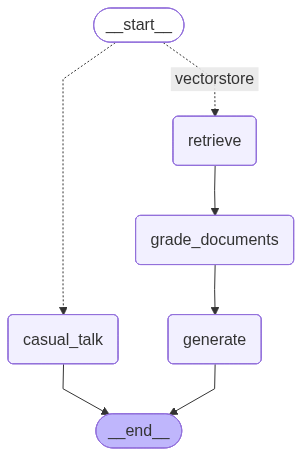

In [49]:
from IPython.display import Image, display

try:
  display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [50]:
inputs = {
  "question": "서울시 자율주행 계획"
}

app.invoke(inputs)

--------ROUTE---------
---Routing to vectorstore----
---RETRIEVE----
---GRADE---
---GENERATE---


{'question': '서울시 자율주행 계획',
 'generation': AIMessage(content='서울시는 자율주행차량을 포함한 미래 교통수단의 도입과 관련해 다음과 같은 계획을 세우고 있습니다:\n\n1. **운영 체계 구축**: 자율주행차는 현재 가장 가시화된 미래 교통기술로, 서울시는 2030년까지 간선도로급 이상의 도로에서 자율주행차가 운영될 수 있는 인프라 환경을 조성할 계획입니다. 그리고 2040년까지 서울 전역에서 자율주행차량이 운행될 수 있는 환경을 구축하고, 이를 통해 수송 분담률 10%를 달성할 목표를 가지고 있습니다.\n\n2. **모빌리티 허브 구축**: 서울시는 도심 및 광역거점에 미래 교통과 기존 교통을 연결하는 모빌리티 허브를 도입할 계획입니다. 이 허브는 교통뿐만 아니라 공공서비스, 물류, 상업 등 다양한 기능을 복합적으로 제공하는 지역 거점이 될 것입니다.\n\n3. **UAM(도심 항공 교통) 인프라 확보**: 서울시는 도심과 김포공항을 연결하는 시범노선을 운영하고, 장기적으로 한강, 지천 등 주요 수변 공간을 중심으로 광역노선을 확장할 계획입니다. 또한, UAM 인프라를 위한 인센티브와 도시계획적인 지원 방안도 함께 검토하고 있습니다.\n\n4. **교통 환경 변화에 대한 대비**: 자율주행차와 기타 미래 교통수단의 도입은 도시 내 이동 패턴의 변화를 가져올 것으로 예상되므로, 서울시는 이에 대한 포용적인 교통체계 구축을 준비하고 있습니다.\n\n이러한 계획들은 서울시가 미래 교통환경 변화에 선제적으로 대응하고, 안전하고 효율적인 교통수단의 조화를 도모하기 위한 노력의 일환입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 415, 'prompt_tokens': 2063, 'total_tokens': 2478, 'completion_tokens_details': {'accepted_pred

In [51]:
inputs = {
  "question": "소리 지르는 니가"
}

app.invoke(inputs)

--------ROUTE---------
---Routing to casual_talk----
---CASUAL TALK---


{'question': '소리 지르는 니가',
 'generation': AIMessage(content='"소리 지르는 니가"라는 표현을 떠올리면, "너를 위해서라면, 나를 다 줄게" 같은 감정이 담긴 가사가 생각납니다. 이러한 가사는 사랑과 열망을 표현하는 데 잘 어울리죠. 혹시 특정 노래를 원하시는 건가요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 31, 'total_tokens': 103, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'finish_reason': 'stop', 'logprobs': None}, id='run--030f1ceb-8733-4fb2-a532-667ad9e5e820-0', usage_metadata={'input_tokens': 31, 'output_tokens': 72, 'total_tokens': 103, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})}

In [52]:
inputs = {
  "question": "서울시의 자율주행 차량 계획은 무엇이 있나요?"
}

for msg, meta in app.stream(inputs, stream_mode="messages"):
  print(msg.content, end='')

--------ROUTE---------
---Routing to vectorstore----
---RETRIEVE----
---GRADE---
---GENERATE---
서울시는 자율주행 차량에 대한 체계적인 계획을 세우고 있으며, 그 주요 내용은 다음과 같습니다:

1. **운영 체계 구축**: 서울시는 자율주행 자동차의 본격 운영을 위한 체계를 단계적으로 구축하고 있습니다. 2030년까지 간선도로급 이상 도로에서 자율주행차가 운영될 수 있도록 도로 인프라 환경을 조성할 계획입니다. 최종적으로 2040년까지 서울 전역에서 자율주행차량의 운행 환경을 구축하고, 수송 분담률 10%를 달성하는 목표를 세우고 있습니다.

2. **모빌리티 허브 구축**: 도심 및 광역거점에 서울 내부와 외부의 연계를 강화하기 위해 다양한 기능을 복합적으로 제공하는 모빌리티 허브를 도입할 예정입니다. 이는 자율주행차량뿐만 아니라 기존 교통과의 연결을 통해 효율적인 교통체계 구축을 목표로 하고 있습니다.

3. **UAM(도심 항공교통) 기반 마련**: 서울시는 도심에서 김포공항까지 시범 노선을 운영하고 있으며, 장기적으로 한강 및 주요 수변 공간을 중심으로 광역 노선을 확장할 계획입니다. UAM 인프라 확보를 위한 인센티브와 도시계획적 지원 방안도 검토 중입니다.

서울시는 이러한 계획을 통해 자율주행 차량과 함께 변화하는 교통 환경에 안전하고 효율적으로 대응하고, 도시 내 다양한 이동 패턴을 포용하는 교통체계 구축을 목표로 하고 있습니다.